<a id="1"></a>
# <p style="background-color:#4E937A;font-family:Courier New;color:#EDEDED;font-size:100%;text-align:center;border-radius:15px 15px;">INITIALIZING PYTHON LIBRARIES</p>


In [2]:
#Importing the Libraries

import os
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport #consumes a lot of time to generate a report so I used sweetviz
import sweetviz as sv

import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.pyplot as plt, numpy as np
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import metrics

from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D


In [3]:
#Shows the current work directory
print(os.getcwd())

c:\Users\Markisha\Desktop\myfpyp\sibin_venv\sibin_dev


<a id="1"></a>
# <p style="background-color:#4E937A;font-family:Courier New;color:#EDEDED;font-size:100%;text-align:center;border-radius:15px 15px;">LOADING DATA</p>


In [4]:
exo_df = pd.read_csv("../data/exoplanets_5250.csv")
print("Number of datapoints:", len(exo_df))
exo_df.head

Number of datapoints: 5250


<bound method NDFrame.head of                       name  distance  stellar_magnitude  planet_type  \
0     11 Comae Berenices b     304.0            4.72307    Gas Giant   
1       11 Ursae Minoris b     409.0            5.01300    Gas Giant   
2          14 Andromedae b     246.0            5.23133    Gas Giant   
3            14 Herculis b      58.0            6.61935    Gas Giant   
4             16 Cygni B b      69.0            6.21500    Gas Giant   
...                    ...       ...                ...          ...   
5245                XO-7 b     764.0           10.52100    Gas Giant   
5246              YSES 2 b     357.0           10.88500    Gas Giant   
5247             YZ Ceti b      12.0           12.07400  Terrestrial   
5248             YZ Ceti c      12.0           12.07400  Super Earth   
5249             YZ Ceti d      12.0           12.07400  Super Earth   

      discovery_year  mass_multiplier mass_wrt  radius_multiplier radius_wrt  \
0               2007     

<a id="1"></a>
# <p style="background-color:#4E937A;font-family:Courier New;color:#EDEDED;font-size:100%;text-align:center;border-radius:15px 15px;">DATA CLEANING</p>


In [5]:
exo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB


In [6]:
# Print column names
for col in exo_df.columns:
    print(col)

name
distance
stellar_magnitude
planet_type
discovery_year
mass_multiplier
mass_wrt
radius_multiplier
radius_wrt
orbital_radius
orbital_period
eccentricity
detection_method


In [7]:
# Create a dictionary to map object values to numerical values
mass_values = {"Jupiter": 1898.000 * 10**24, "Earth": 5.970 * 10**24}
radius_values = {"Jupiter": 71492, "Earth": 6371}

# Convert object values to numerical values using map
exo_df['mass_wrt_numeric'] = exo_df['mass_wrt'].map(mass_values)
exo_df['radius_wrt_numeric'] = exo_df['radius_wrt'].map(radius_values)

# Calculate mass and radius using the numeric columns
exo_df['mass'] = exo_df['mass_multiplier'] * exo_df['mass_wrt_numeric']
exo_df['radius'] = exo_df['radius_multiplier'] * exo_df['radius_wrt_numeric']

# Print column names
for col in exo_df.columns:
    print(col)


name
distance
stellar_magnitude
planet_type
discovery_year
mass_multiplier
mass_wrt
radius_multiplier
radius_wrt
orbital_radius
orbital_period
eccentricity
detection_method
mass_wrt_numeric
radius_wrt_numeric
mass
radius


In [8]:
display(exo_df.head(20))

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,mass_wrt_numeric,radius_wrt_numeric,mass,radius
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity,1.898000e+27,71492.0,3.682120e+28,77211.360
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity,1.898000e+27,71492.0,2.797652e+28,77926.280
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity,1.898000e+27,71492.0,9.110400e+27,82215.800
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity,1.898000e+27,71492.0,1.544746e+28,80071.040
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity,1.898000e+27,71492.0,3.378440e+27,85790.400
5,17 Scorpii b,408.0,5.22606,Gas Giant,2020,4.32000,Jupiter,1.150,Jupiter,1.450000,1.600000,0.06,Radial Velocity,1.898000e+27,71492.0,8.199360e+27,82215.800
6,18 Delphini b,249.0,5.51048,Gas Giant,2008,10.30000,Jupiter,1.110,Jupiter,2.600000,2.700000,0.08,Radial Velocity,1.898000e+27,71492.0,1.954940e+28,79356.120
7,1RXS J160929.1-210524 b,454.0,12.61800,Gas Giant,2008,8.00000,Jupiter,1.664,Jupiter,330.000000,6505.900000,0.00,Direct Imaging,1.898000e+27,71492.0,1.518400e+28,118962.688
8,24 Bootis b,313.0,5.59000,Gas Giant,2018,0.91000,Jupiter,1.240,Jupiter,0.190000,0.083231,0.04,Radial Velocity,1.898000e+27,71492.0,1.727180e+27,88650.080
9,24 Sextantis b,235.0,6.45350,Gas Giant,2010,1.99000,Jupiter,1.190,Jupiter,1.333000,1.239699,0.09,Radial Velocity,1.898000e+27,71492.0,3.777020e+27,85075.480


In [9]:
# Drop specified columns
exo_df = exo_df.drop(columns=['mass_wrt_numeric', 'radius_wrt_numeric', 'mass_wrt', 'radius_wrt', 'mass_multiplier', 'radius_multiplier'])

In [10]:
# Print the updated DataFrame
display(exo_df.head(20))

,name,distance,stellar_magnitude,planet_type,discovery_year,orbital_radius,orbital_period,eccentricity,detection_method,mass,radius
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,1.290000,0.892539,0.23,Radial Velocity,3.682120e+28,77211.360
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,1.530000,1.400000,0.08,Radial Velocity,2.797652e+28,77926.280
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,0.830000,0.508693,0.00,Radial Velocity,9.110400e+27,82215.800
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,2.773069,4.800000,0.37,Radial Velocity,1.544746e+28,80071.040
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.660000,2.200000,0.68,Radial Velocity,3.378440e+27,85790.400
5,17 Scorpii b,408.0,5.22606,Gas Giant,2020,1.450000,1.600000,0.06,Radial Velocity,8.199360e+27,82215.800
6,18 Delphini b,249.0,5.51048,Gas Giant,2008,2.600000,2.700000,0.08,Radial Velocity,1.954940e+28,79356.120
7,1RXS J160929.1-210524 b,454.0,12.61800,Gas Giant,2008,330.000000,6505.900000,0.00,Direct Imaging,1.518400e+28,118962.688
8,24 Bootis b,313.0,5.59000,Gas Giant,2018,0.190000,0.083231,0.04,Radial Velocity,1.727180e+27,88650.080
9,24 Sextantis b,235.0,6.45350,Gas Giant,2010,1.333000,1.239699,0.09,Radial Velocity,3.777020e+27,85075.480


In [11]:
columns_with_nan = exo_df.columns[exo_df.isna().any()]

In [12]:
print("Columns with NaN values:")
for column in columns_with_nan:
    print(column)

Columns with NaN values:
distance
stellar_magnitude
orbital_radius
mass
radius


In [13]:
rows_with_nan = exo_df[exo_df.isna().any(axis=1)]

In [14]:
print(rows_with_nan)

                               name  distance  stellar_magnitude planet_type  \
14        2MASS J02192210-3925225 b     131.0                NaN   Gas Giant   
15        2MASS J04414489+2301513 b     393.0                NaN   Gas Giant   
80         CFBDSIR J145829+101343 b      75.0                NaN   Gas Giant   
81                 CFHTWIR-Oph 98 b       NaN                NaN   Gas Giant   
82                        CHXR 73 b     621.0                NaN   Gas Giant   
...                             ...       ...                ...         ...   
5055                     WASP-107 c     211.0             11.592   Gas Giant   
5057                     WASP-110 b     897.0             12.762   Gas Giant   
5069                     WASP-126 c     706.0             10.994   Gas Giant   
5173                      WASP-53 c     657.0             12.591   Gas Giant   
5229  WISEP J121756.91+162640.2 A b      33.0                NaN   Gas Giant   

      discovery_year  orbital_radius  o

In [15]:
exo_df_cleaned = exo_df.dropna()

In [16]:
exo_df.dropna(inplace=True)

In [17]:
unique_values = exo_df['planet_type'].unique()
print(unique_values)


['Gas Giant' 'Super Earth' 'Neptune-like' 'Terrestrial']


<a id="1"></a>
# <p style="background-color:#4E937A;font-family:Courier New;color:#EDEDED;font-size:100%;text-align:center;border-radius:15px 15px;">CORRELATION MATRIX AND HEATMAP</p>

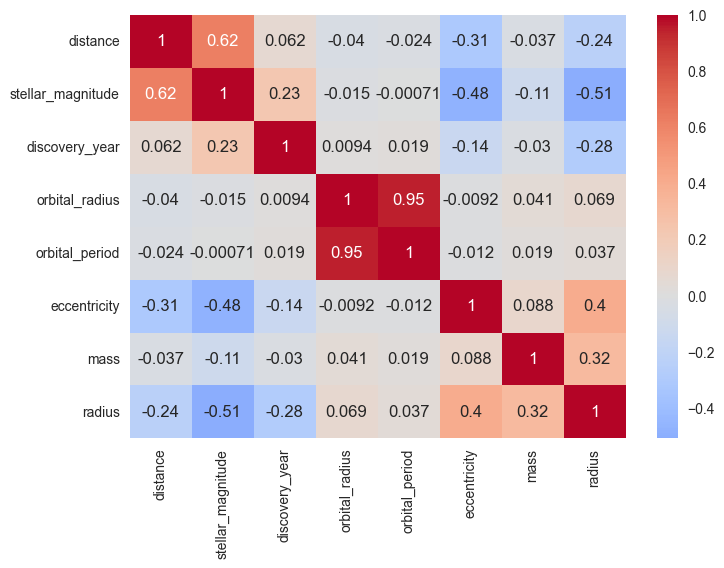

In [18]:
# Select only numeric columns
numeric_columns = exo_df_cleaned.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
corr_matrix = exo_df_cleaned[numeric_columns].corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

    This correlation matrix is describing relationships between various characteristics of exoplanets. Here are some conclusions that can be drawn from this matrix:

    Orbital Radius and Orbital Period: 
    There's a very strong positive correlation (0.952653) between the orbital radius of an object and its orbital period. This is consistent with Kepler's Third Law of planetary motion, which states that the square of the orbital period of a planet is directly proportional to the cube of the semi-major axis of its orbit (which is essentially its average distance from the star).

    Stellar Magnitude and Distance: 
    There is a significant positive correlation (0.619741) between the distance of the objects and their stellar magnitudes. This makes sense as the further away an object is, the less bright it appears from our perspective on Earth.

    Stellar Magnitude and Eccentricity: 
    There's a fairly strong negative correlation (-0.477936) between the stellar magnitude and the eccentricity of the orbit. This could imply that planets with more elliptical orbits (higher eccentricity) tend to be around less bright (higher magnitude) stars, but the causal relationship isn't clear.

    Radius and Mass: 
    There's a moderate positive correlation (0.321795) between the mass and radius of the objects. This suggests that more massive objects tend to be larger, which is generally expected.

    Eccentricity and Radius: 
    There is a moderate positive correlation (0.400395) between eccentricity and radius. This might imply that larger planets tend to have more elliptical orbits, but again the causal relationship isn't clear.

    Discovery Year: 
    The year of discovery doesn't seem to have strong correlation with any other properties. The strongest correlation is with stellar magnitude (0.230585), suggesting that as time has passed, we've gotten better at finding planets around dimmer stars.

Relative Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

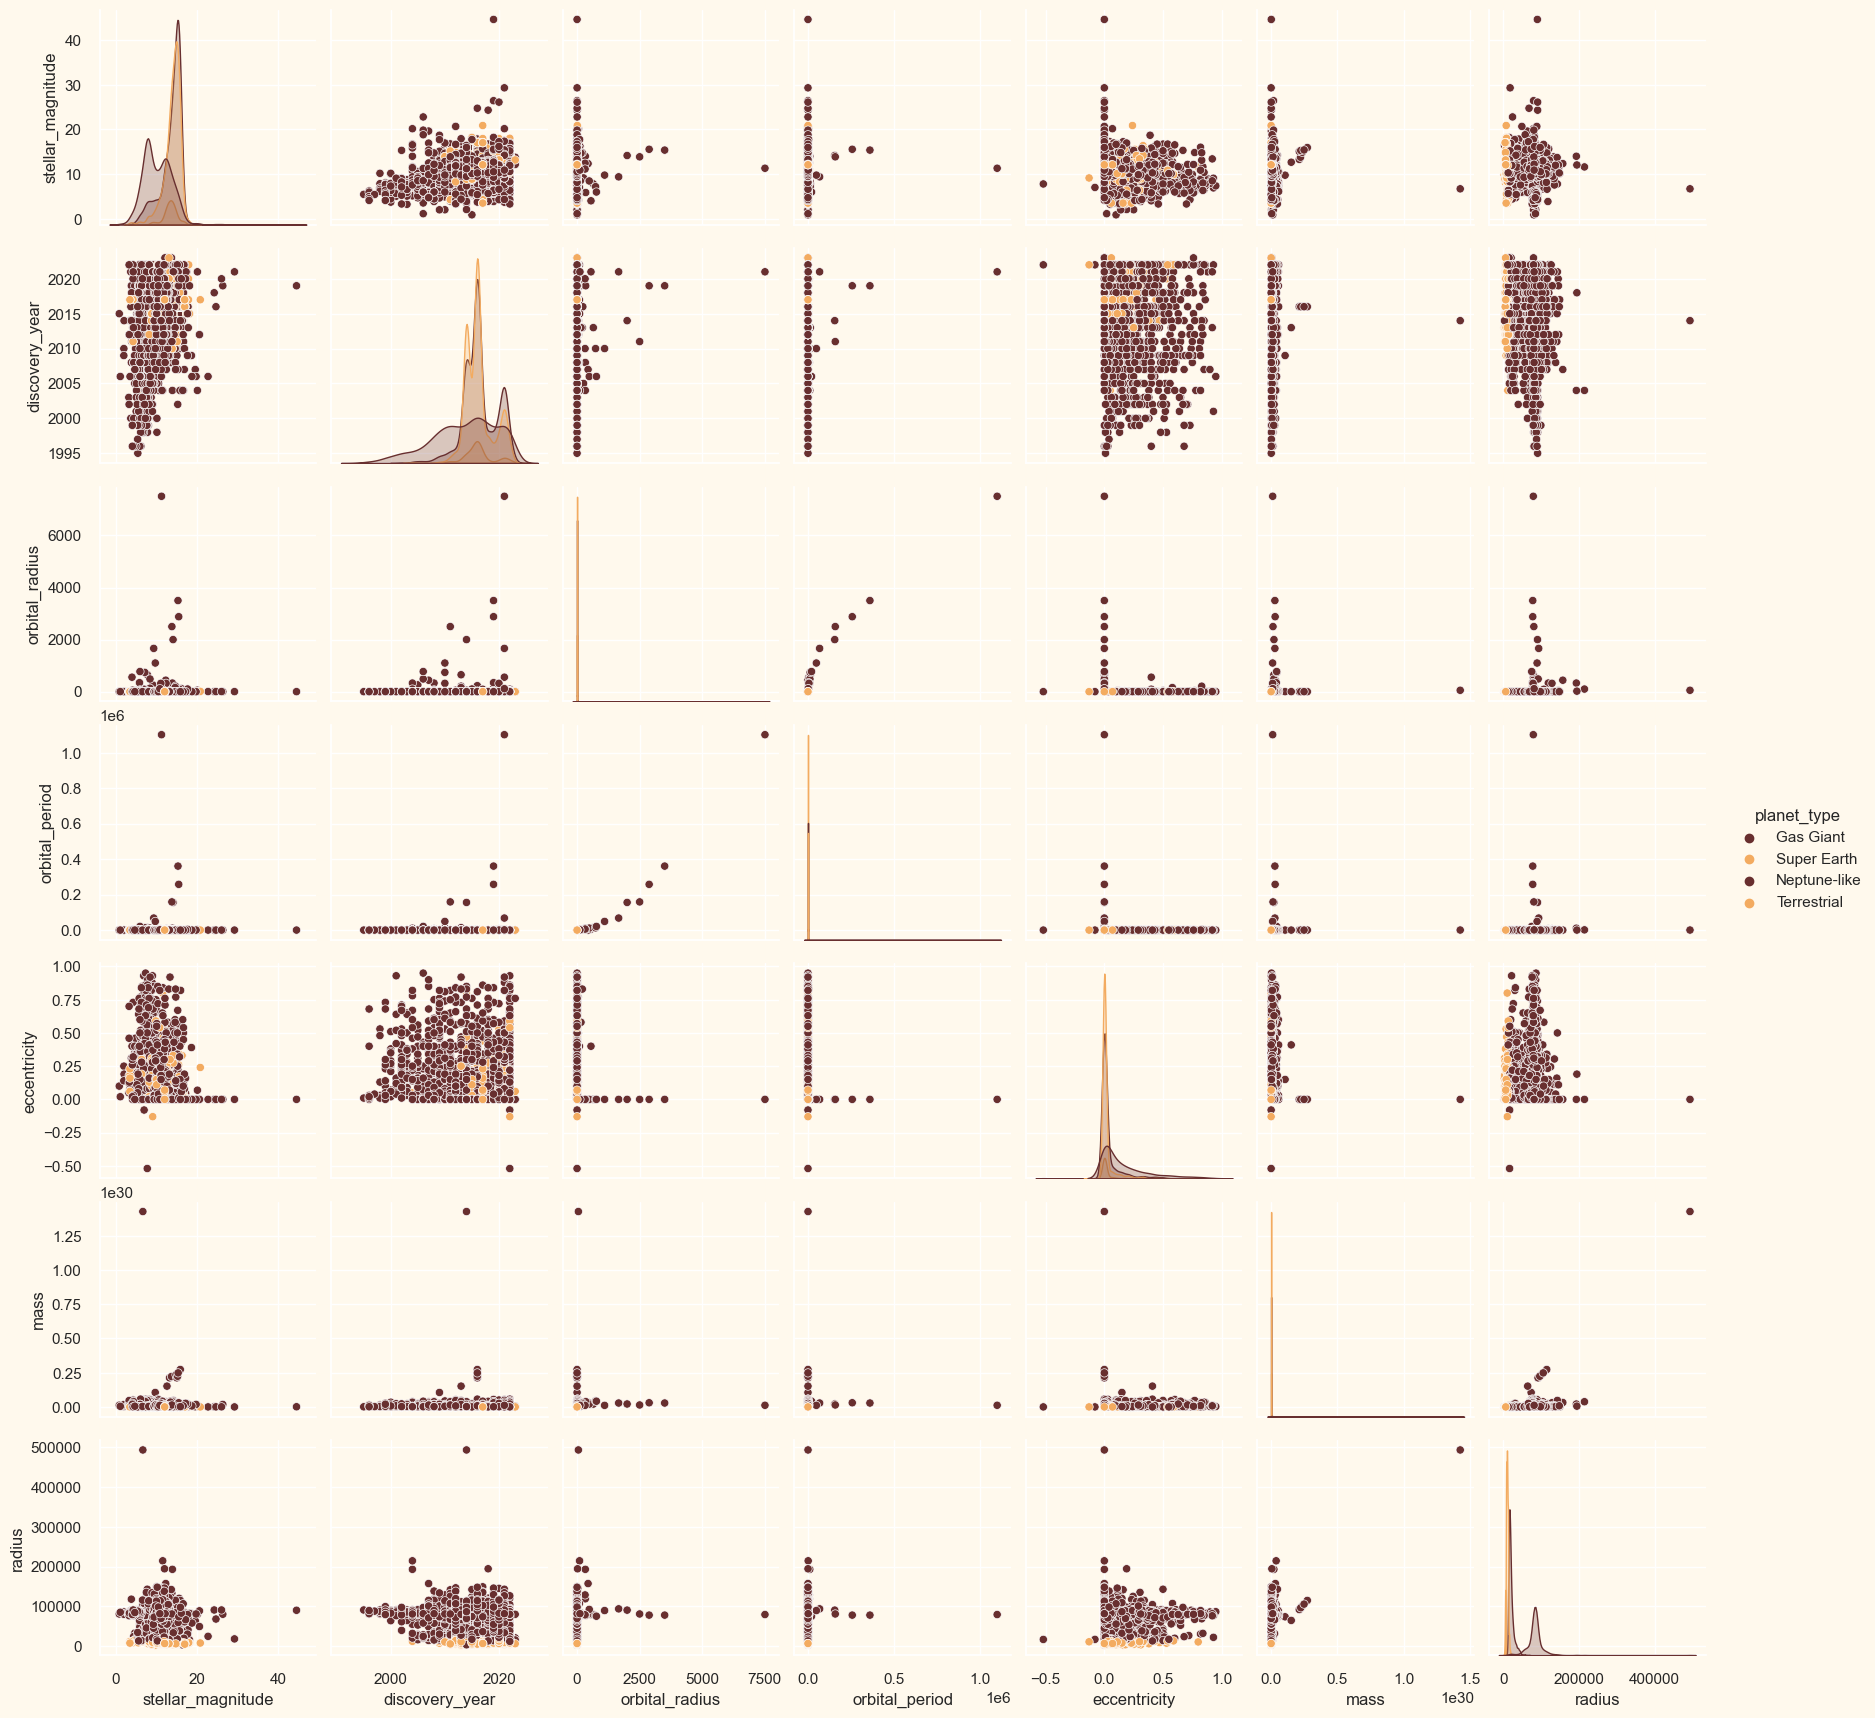

In [19]:
 #Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#8C564B"]
cmap = colors.ListedColormap(["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#8C564B"])
#Plotting following features
To_Plot = [ "stellar_magnitude", "discovery_year", "orbital_radius", "orbital_period", "eccentricity", "mass", "radius", "planet_type"]
print("Relative Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(exo_df_cleaned[To_Plot], hue= "planet_type",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

<a id="1"></a>
# <p style="background-color:#4E937A;font-family:Courier New;color:#EDEDED;font-size:100%;text-align:center;border-radius:15px 15px;">DATA PREPROCESSING</p>


In [20]:
from sklearn.preprocessing import LabelEncoder

# Creating an example categorical feature
exo_categories = ['Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial', 'Unknown']

# Creating an instance of the LabelEncoder
le = LabelEncoder()

# Fitting and transforming the categorical feature using the LabelEncoder
encoded_categories = le.fit_transform(exo_categories)

print(encoded_categories)

[0 2 1 3 4]


In [21]:
#Creating a copy of data
ds = exo_df_cleaned.copy()
# creating a subset of dataframe by dropping the name, planet type and detection method
cols_del = ['name', 'planet_type', 'detection_method']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [22]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head(10)

Dataframe to be used for further modelling:


,distance,stellar_magnitude,discovery_year,orbital_radius,orbital_period,eccentricity,mass,radius
0,-0.823214,-2.529758,-2.006155,-0.037950,-0.027315,1.118030,1.457075,1.235027
1,-0.765295,-2.437727,-1.533249,-0.036242,-0.027286,0.085147,1.079145,1.256112
2,-0.855207,-2.368424,-1.769702,-0.041224,-0.027337,-0.465724,0.273003,1.382621
3,-0.958910,-1.927832,-3.188421,-0.027396,-0.027092,2.082054,0.543783,1.319367
4,-0.952842,-2.056182,-4.607140,-0.035317,-0.027240,4.216679,0.028078,1.488045
5,-0.765847,-2.370097,1.067736,-0.036812,-0.027274,-0.052570,0.234075,1.382621
6,-0.853552,-2.279815,-1.769702,-0.028628,-0.027212,0.085147,0.719057,1.298282
7,-0.740473,-0.023710,-1.769702,2.301202,0.343528,-0.465724,0.532526,2.466381
8,-0.818249,-2.254573,0.594830,-0.045778,-0.027361,-0.190288,-0.042479,1.572385
9,-0.861275,-1.980476,-1.296796,-0.037644,-0.027295,0.154006,0.045110,1.466960


<a id="1"></a>
# <p style="background-color:#4E937A;font-family:Courier New;color:#EDEDED;font-size:100%;text-align:center;border-radius:15px 15px;">DIMENSIONALITY REDUCTION</p>


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_ds)

scaled_ds['pca-one'] = pca_result[:,0]
scaled_ds['pca-two'] = pca_result[:,1]

scaled_ds.head()


,distance,stellar_magnitude,discovery_year,orbital_radius,orbital_period,eccentricity,mass,radius,pca-one,pca-two
0,-0.823214,-2.529758,-2.006155,-0.037950,-0.027315,1.118030,1.457075,1.235027,3.562466,-0.480162
1,-0.765295,-2.437727,-1.533249,-0.036242,-0.027286,0.085147,1.079145,1.256112,2.860804,-0.363917
2,-0.855207,-2.368424,-1.769702,-0.041224,-0.027337,-0.465724,0.273003,1.382621,2.583026,-0.351150
3,-0.958910,-1.927832,-3.188421,-0.027396,-0.027092,2.082054,0.543783,1.319367,3.863779,-0.598784
4,-0.952842,-2.056182,-4.607140,-0.035317,-0.027240,4.216679,0.028078,1.488045,5.184814,-0.886014


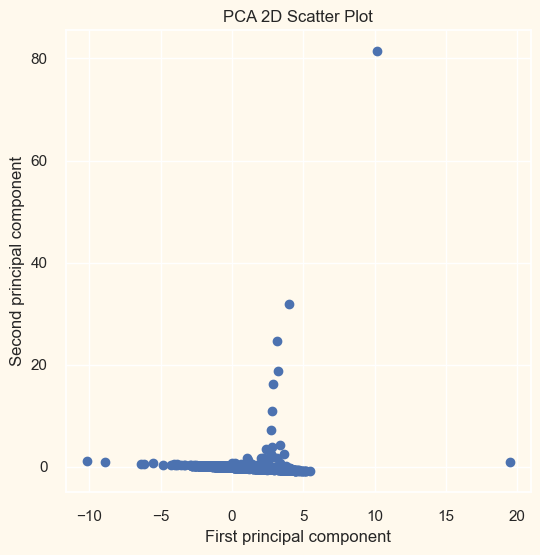

In [24]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(scaled_ds['pca-one'], scaled_ds['pca-two'], cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA 2D Scatter Plot')
plt.show()


In [25]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["pca-one","pca-two", "pca-three"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
pca-one,4765.0,0.000000e+00,2.215366,-14.367400,-1.556820,-0.792064,1.352247,27.520917
pca-two,4765.0,1.192936e-17,1.976001,-1.253013,-0.189254,0.018855,0.107649,115.108813
pca-three,4765.0,0.000000e+00,1.047580,-2.997639,-0.426298,-0.017961,0.378814,47.570728


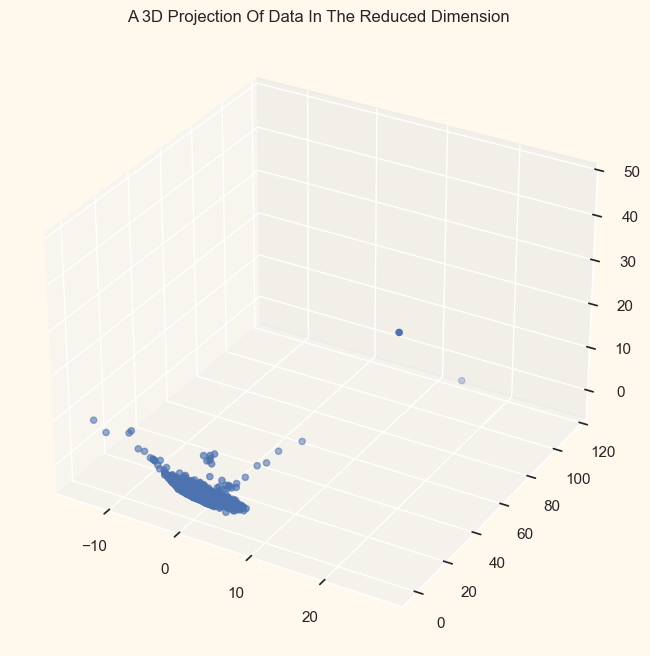

In [26]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["pca-one"]
y =PCA_ds["pca-two"]
z =PCA_ds["pca-three"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

<a id="1"></a>
# <p style="background-color:#4E937A;font-family:Courier New;color:#EDEDED;font-size:100%;text-align:center;border-radius:15px 15px;">CLUSTERING</p>


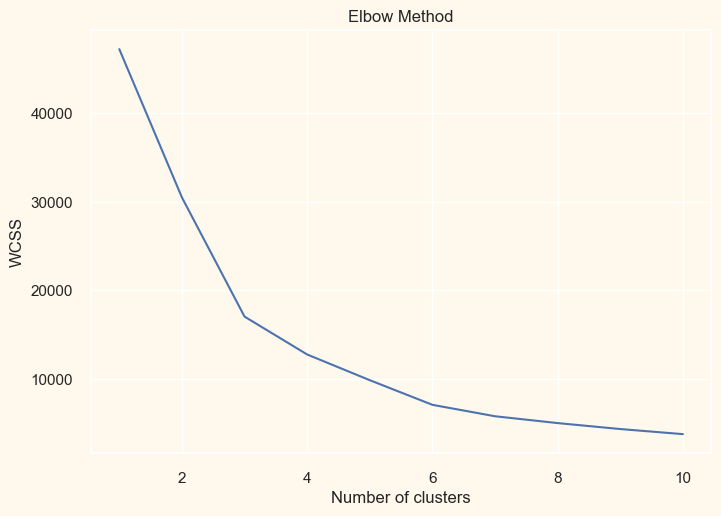

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(PCA_ds[['pca-one', 'pca-two', 'pca-three']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Elbow Method to determine the number of clusters to be formed:


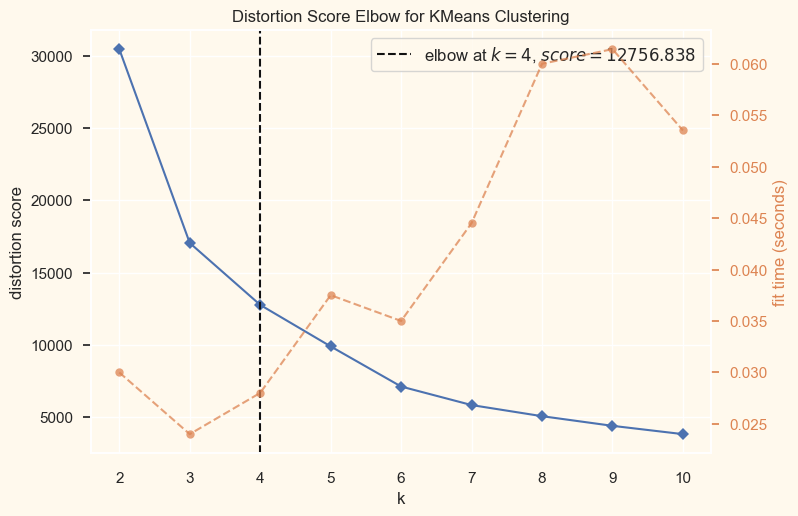

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [29]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
exo_df_cleaned["Clusters"]= yhat_AC

In [30]:
exo_df_cleaned

,name,distance,stellar_magnitude,planet_type,discovery_year,orbital_radius,orbital_period,eccentricity,detection_method,mass,radius,Clusters
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,1.290000,0.892539,0.23,Radial Velocity,3.682120e+28,77211.360,0
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,1.530000,1.400000,0.08,Radial Velocity,2.797652e+28,77926.280,0
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,0.830000,0.508693,0.00,Radial Velocity,9.110400e+27,82215.800,0
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,2.773069,4.800000,0.37,Radial Velocity,1.544746e+28,80071.040,0
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.660000,2.200000,0.68,Radial Velocity,3.378440e+27,85790.400,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.044210,0.007940,0.04,Transit,1.345682e+27,98158.516,0
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,115.000000,1176.500000,0.00,Direct Imaging,1.195740e+28,81500.880,0
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.016340,0.005476,0.06,Radial Velocity,4.179000e+24,5816.723,1
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,0.021560,0.008487,0.00,Radial Velocity,6.805800e+24,6689.550,1


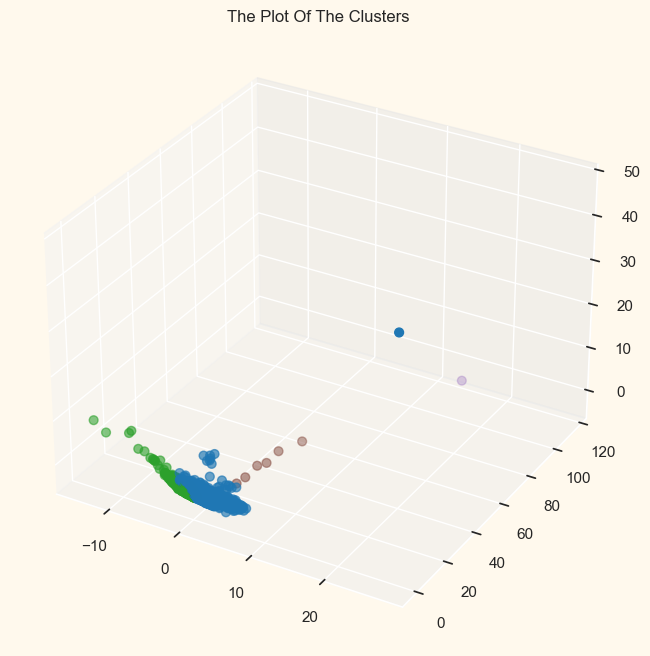

In [31]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="exoclusters")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

<a id="1"></a>
# <p style="background-color:#4E937A;font-family:Courier New;color:#EDEDED;font-size:100%;text-align:center;border-radius:15px 15px;">EVALUATING MODELS</p>


    Differences between Clusters: The clusters represent groups of exoplanets with similar properties. The nature of these properties depends on what features were used for the clustering. They are based on physical characteristics like mass, radius, or orbital period, and other properties.

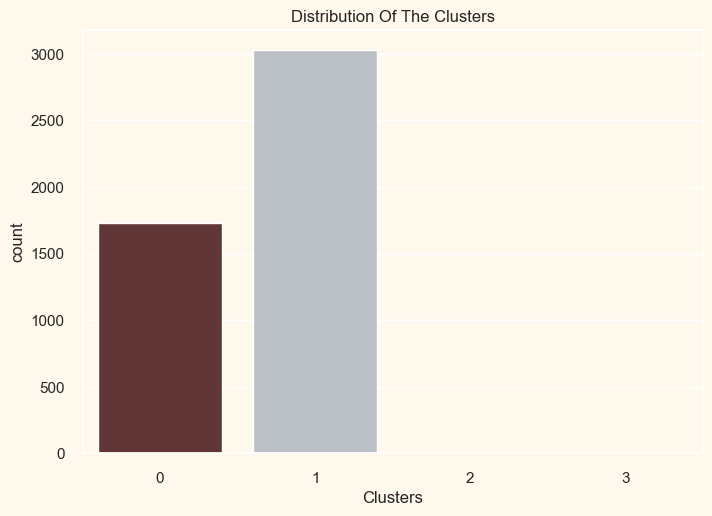

In [32]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=PCA_ds["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

    Scatter plot of orbital period vs. orbital radius: This plot can help to explore the relationship between an exoplanet's orbital period and its distance from its host star, which can provide insights into planetary system dynamics.

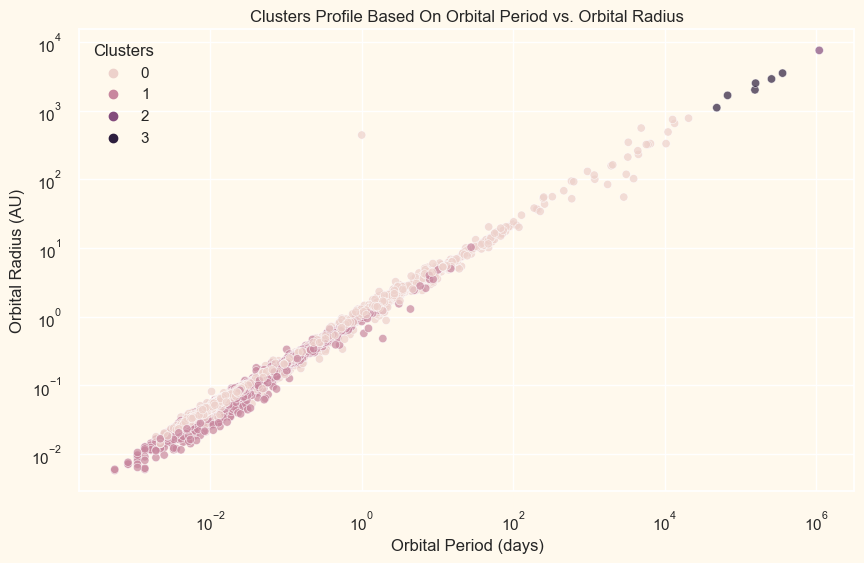

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=exo_df, x='orbital_period', y='orbital_radius', hue=exo_df_cleaned['Clusters'], alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Orbital Radius (AU)')
plt.title('Clusters Profile Based On Orbital Period vs. Orbital Radius')
plt.legend(title='Clusters')
plt.show()

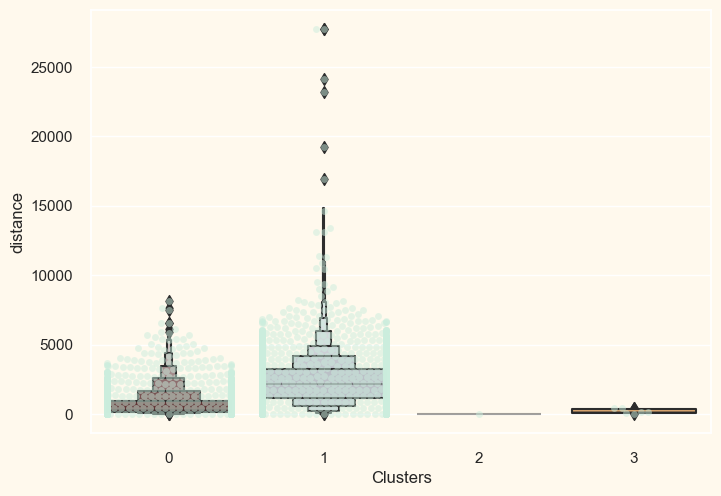

In [34]:
plt.figure()
pl=sns.swarmplot(x=exo_df_cleaned["Clusters"], y=exo_df_cleaned["distance"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=exo_df_cleaned["Clusters"], y=exo_df_cleaned["distance"], palette=pal)
plt.show()

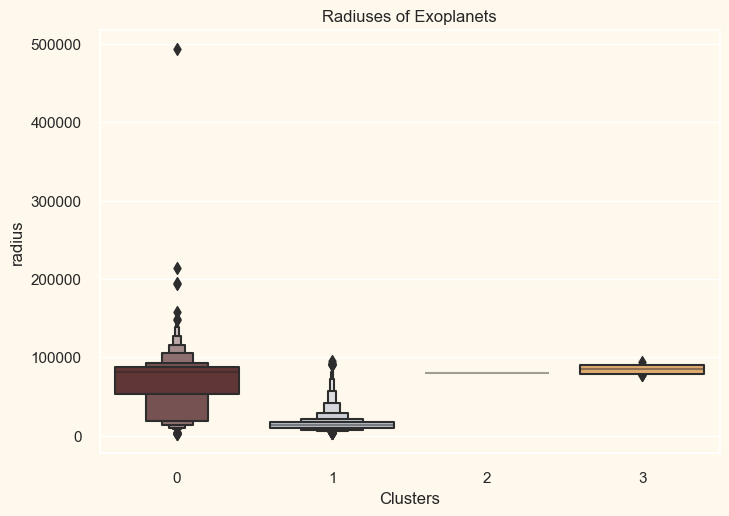

In [35]:
#Plotting the Radiuses of Exoplanets
plt.figure()
pl=sns.boxenplot(y=exo_df_cleaned["radius"],x=exo_df_cleaned["Clusters"], palette= pal)
pl.set_title("Radiuses of Exoplanets")
plt.show()

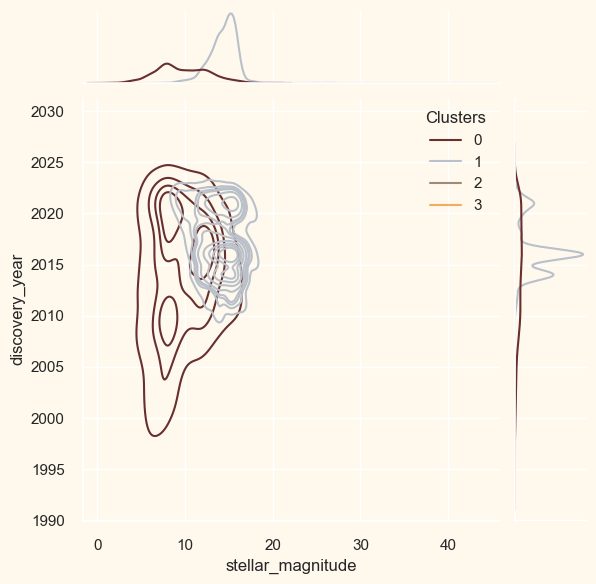

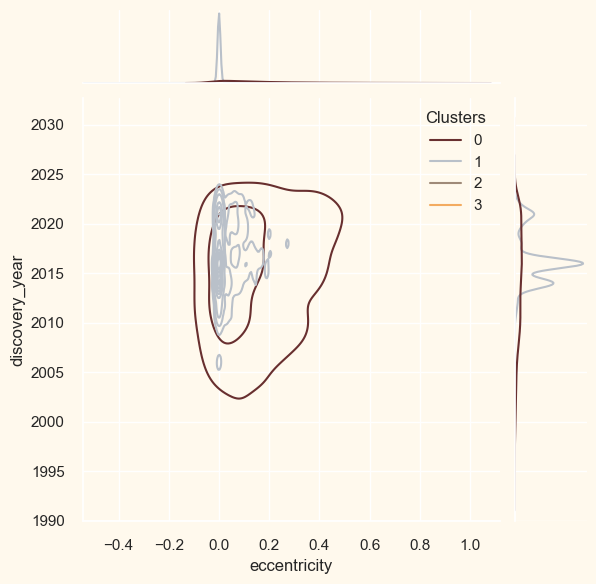

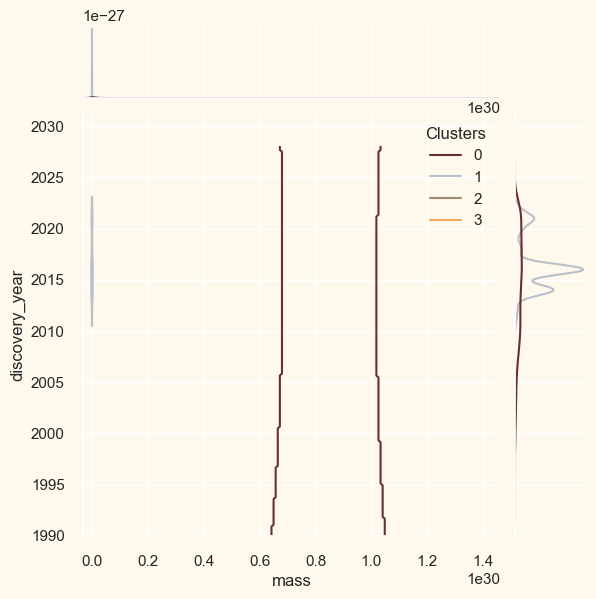

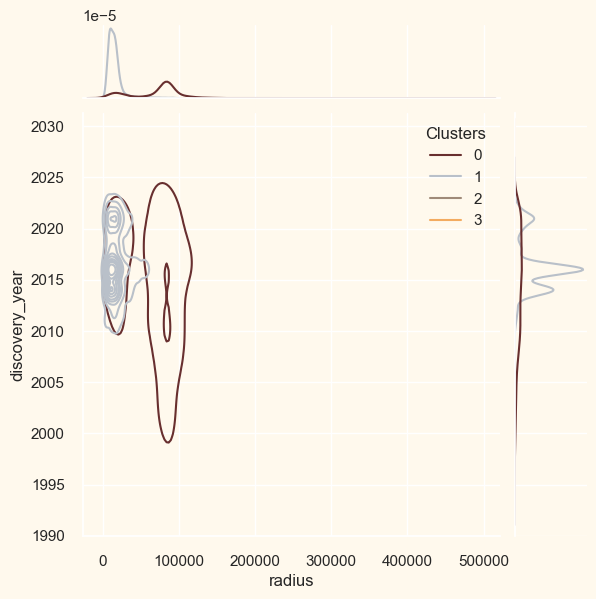

In [36]:
import seaborn as sns

features = ["stellar_magnitude", "eccentricity", "mass", "radius"]

for i in features:
    sns.jointplot(x=exo_df_cleaned[i], y=exo_df_cleaned["discovery_year"], hue=exo_df_cleaned["Clusters"], kind="kde", palette=pal)

<a id="1"></a>
# <p style="background-color:#4E937A;font-family:Courier New;color:#EDEDED;font-size:100%;text-align:center;border-radius:15px 15px;">MORE INSIGHTS AND PLOTS FROM THE DATASET</p>

    Bar plot of exoplanet types: This plot will show the distribution of exoplanet types, which can help to identify the most common types of exoplanets discovered.

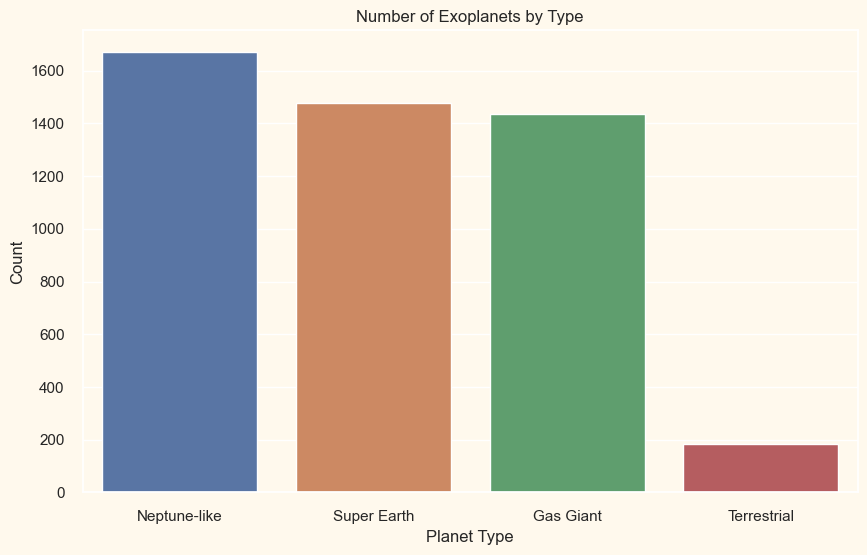

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=exo_df, x='planet_type', order=exo_df['planet_type'].value_counts().index)
plt.xlabel('Planet Type')
plt.ylabel('Count')
plt.title('Number of Exoplanets by Type')
plt.show()

    Scatter plot of distance vs. stellar magnitude: This plot can help understand the relationship between the distance to an exoplanet and its host star's magnitude, potentially revealing trends in detectability.

    Exoplanets around stars with higher magnitudes (which are dimmer) tend to be further away. This is consistent with the positive correlation indicated in the correlation matrix.

    For example, exoplanets around brighter stars (lower stellar magnitude) or closer to Earth might be overrepresented due to easier detection.

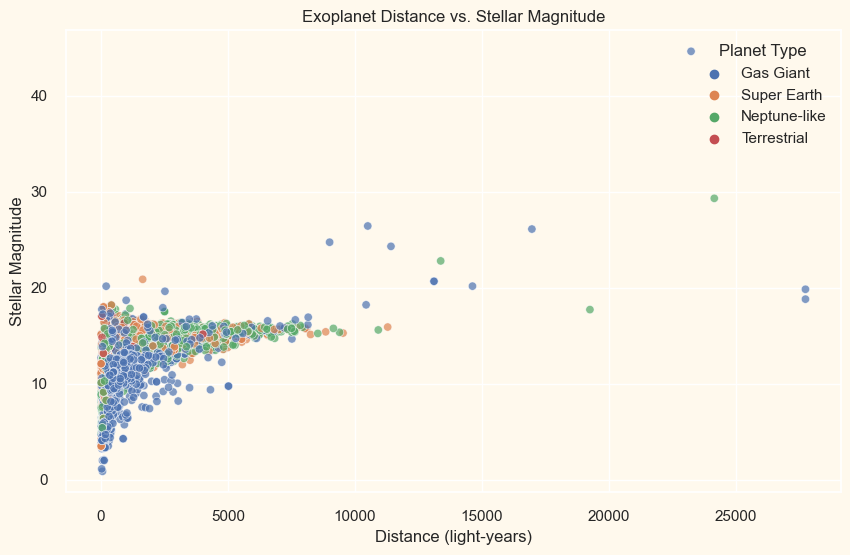

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=exo_df, x='distance', y='stellar_magnitude', hue='planet_type', alpha=0.7)
plt.xlabel('Distance (light-years)')
plt.ylabel('Stellar Magnitude')
plt.title('Exoplanet Distance vs. Stellar Magnitude')
plt.legend(title='Planet Type')
plt.show()


    Histogram of discovery years: This plot will show the distribution of exoplanet discoveries over the years, allowing to analyze the pace of discovery.

    More recent years have higher bars, that suggests an increasing trend in the rate of discovery, which could reflect advances in our technology and methods for detecting exoplanets.

    The earliest year with discoveries represents the start of successful exoplanet detection (1995.)

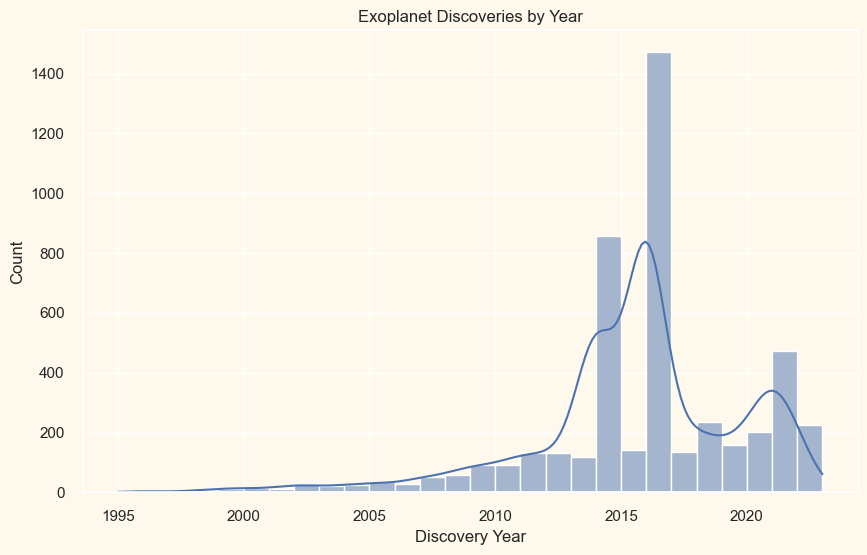

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=exo_df, x='discovery_year', bins=range(exo_df['discovery_year'].min(), exo_df['discovery_year'].max() + 1), kde=True)
plt.xlabel('Discovery Year')
plt.ylabel('Count')
plt.title('Exoplanet Discoveries by Year')
plt.show()


    Scatter plot of mass vs. radius: This plot can help to understand the relationship between the mass and radius of exoplanets, which can provide insights into their composition and structure.
    
    Planet Types - The color coding by 'planet_type' allows us to see if there are any patterns or clusters based on the type of planet. For example, we might find that gas giants tend to have a larger mass and radius compared to terrestrial planets.

    Composition and Structure Insights - For example, planets with similar mass but different radii may have different compositions. A larger radius for a given mass suggests a less dense planet, which could indicate a gas-dominated composition, while a smaller radius suggests a denser, possibly rocky planet.


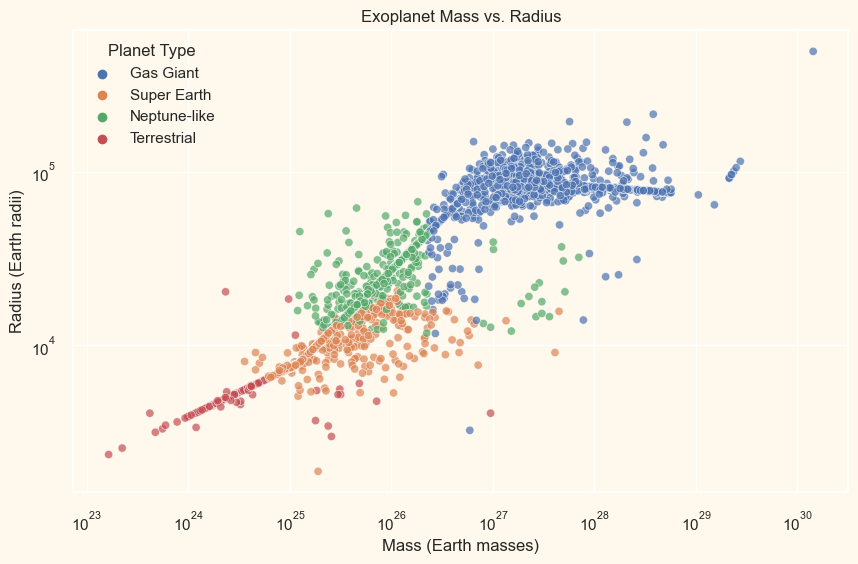

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=exo_df, x='mass', y='radius', hue='planet_type', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mass (Earth masses)')
plt.ylabel('Radius (Earth radii)')
plt.title('Exoplanet Mass vs. Radius')
plt.legend(title='Planet Type')
plt.show()

    Box plot of planet mass by detection method: This plot will show the distribution of exoplanet masses for each detection method.

    If there's a noticeable absence of planets in certain areas of the plot (for example, far away planets around dim stars), it might reflect the limitations of our current exoplanet detection methods.

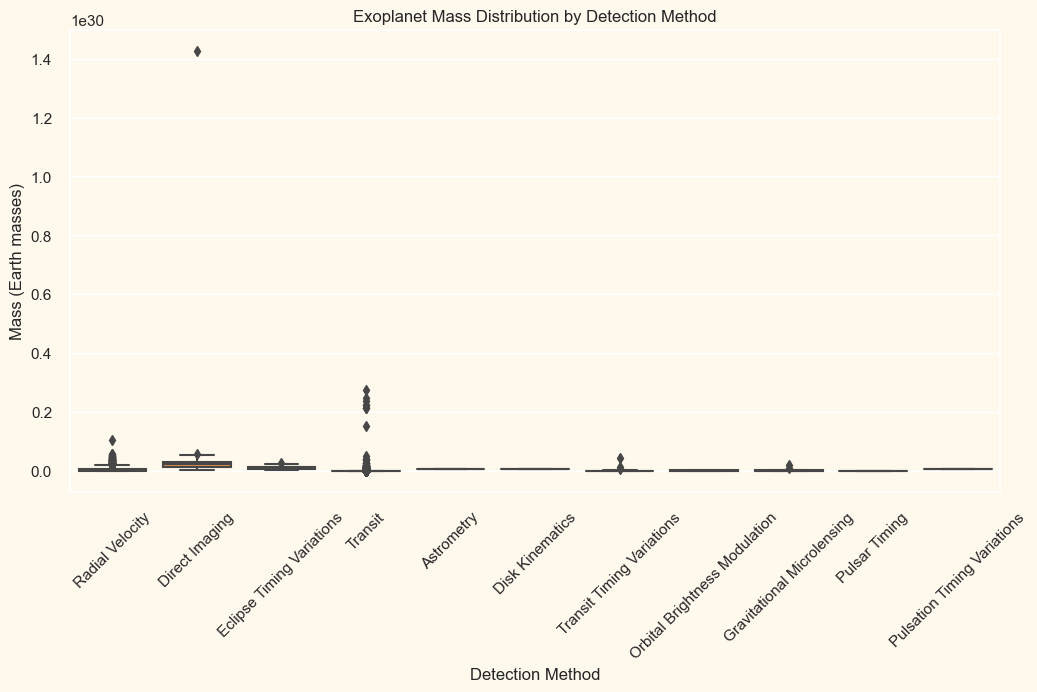

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=exo_df_cleaned, x='detection_method', y='mass')
plt.xlabel('Detection Method')
plt.ylabel('Mass (Earth masses)')
plt.title('Exoplanet Mass Distribution by Detection Method')
plt.xticks(rotation=45)  # Rotate x labels by 45 degrees
plt.show()



<a id="1"></a>
# <p style="background-color:#4E937A;font-family:Courier New;color:#EDEDED;font-size:100%;text-align:center;border-radius:15px 15px;">SWEETVIZ REPORT</p>


    The Sweetviz report contains a lot of useful information:

    Variable Types - It identifies the variable types (numerical or categorical) in the dataset.

    Missing Values - It shows the number and percentage of missing values for each variable.

    Distributions - For numerical variables, it provides a histogram to visualize the distribution. For categorical variables, it provides a bar chart showing the frequency of each category.

    Comparisons - If you have a target variable in a machine learning task, Sweetviz can compare the distributions of the other variables for different values of the target. It can also compare two different datasets, such as a training set and a test set. (Not used in my case since I am exploring one dataset.)

    Correlations - It shows the associations between variables, including both Pearson and Spearman correlations for numerical variables, and associations for categorical variables.

    Other Statistics - For numerical variables, it provides statistics like mean, median, mode, standard deviation, and quartiles.

                                             |          | [  0%]   00:00 -> (? left)


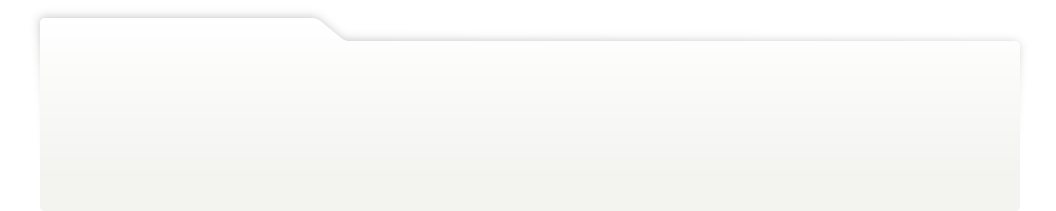
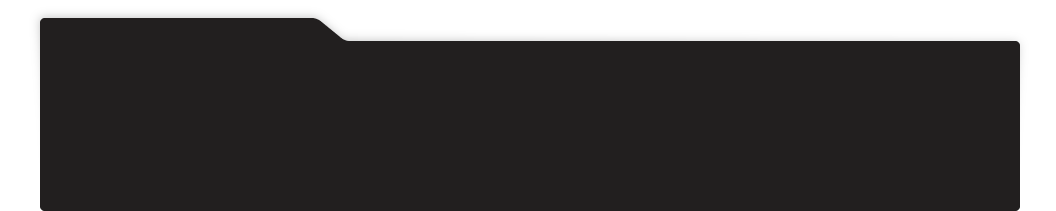
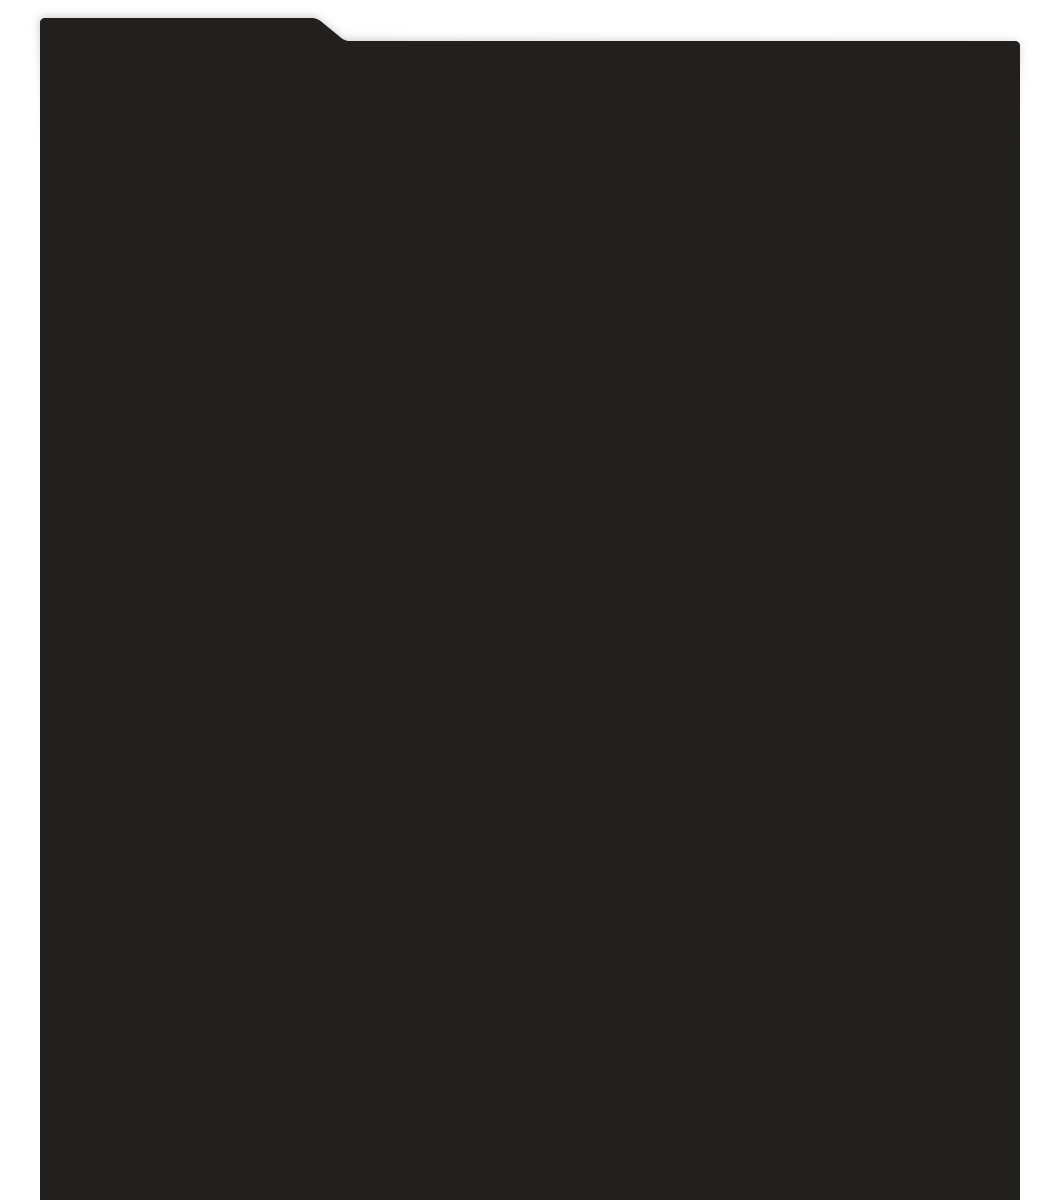
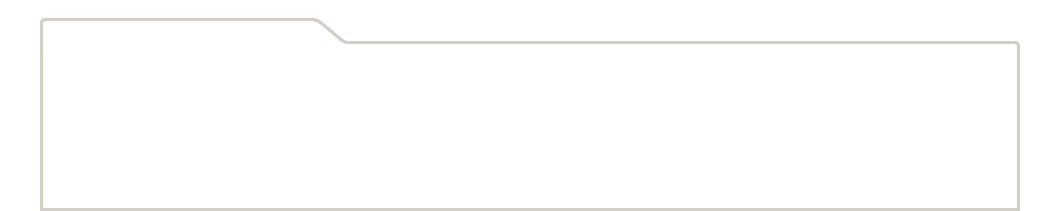
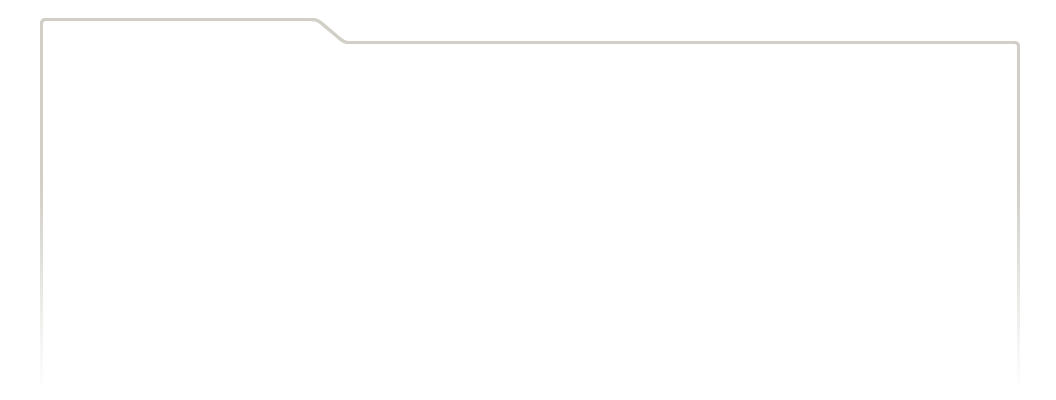
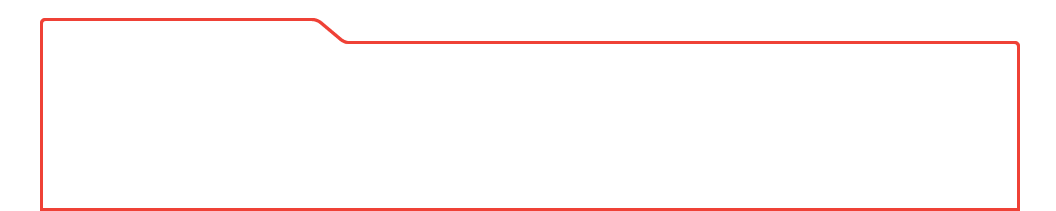
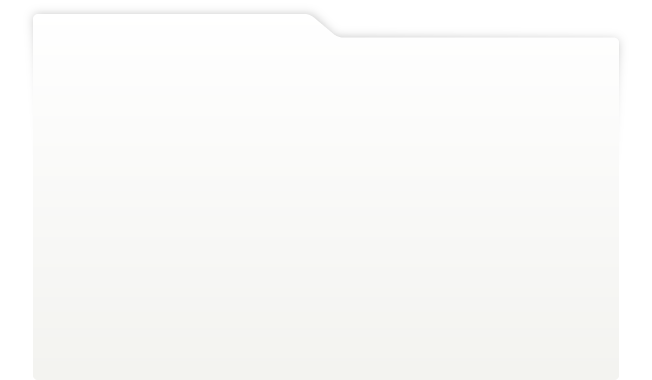
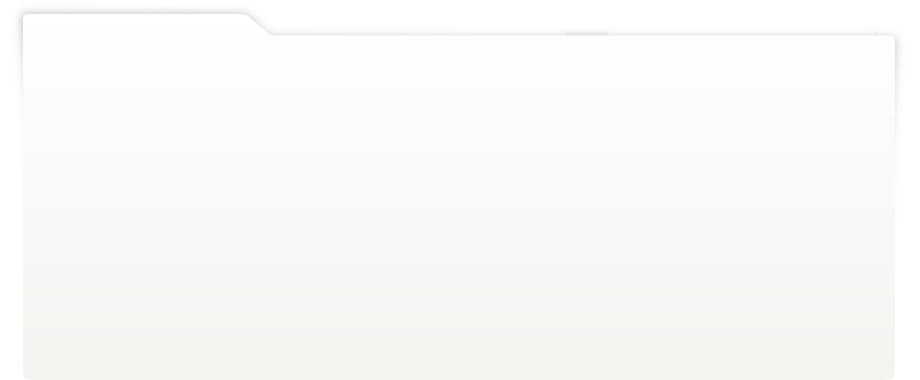
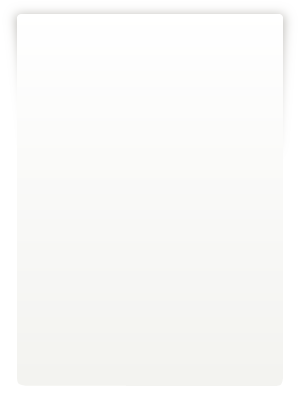
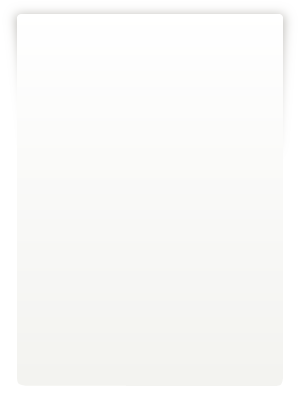
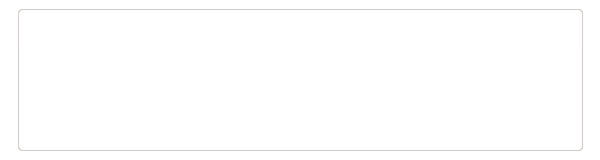
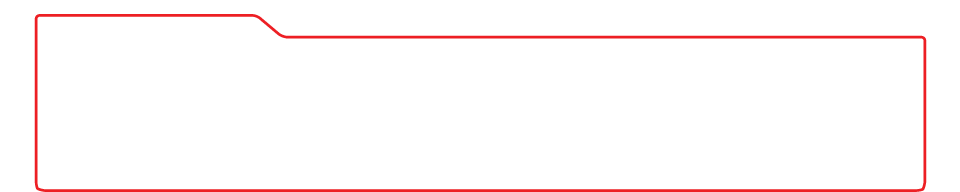
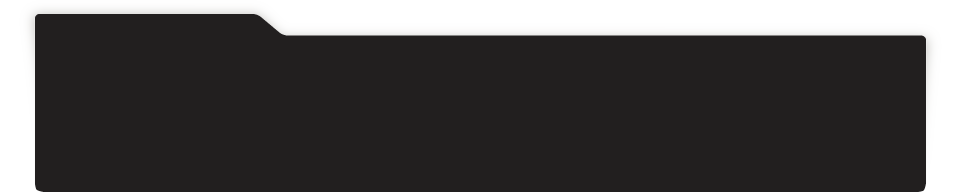
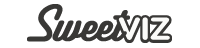
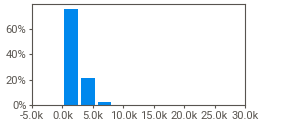
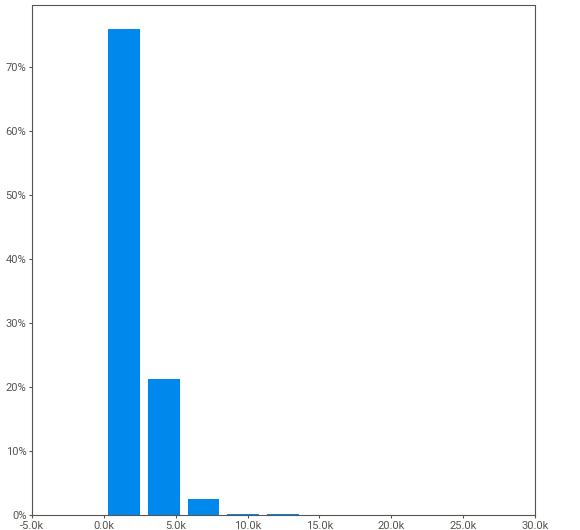
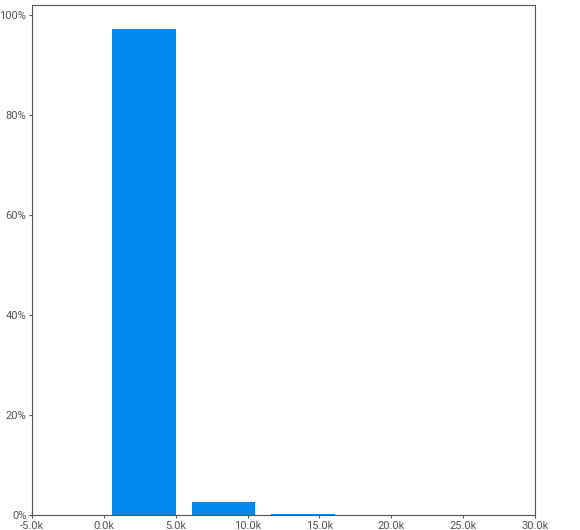
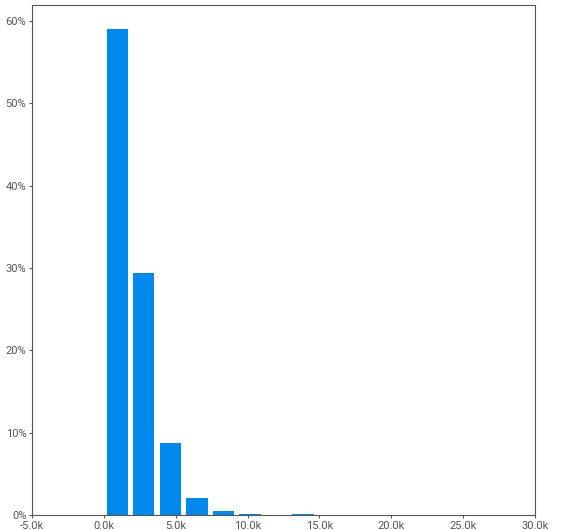
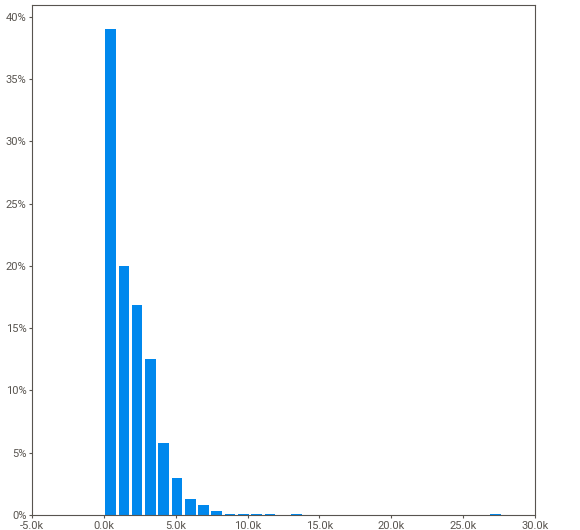
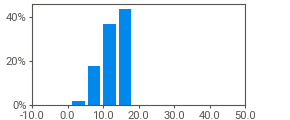
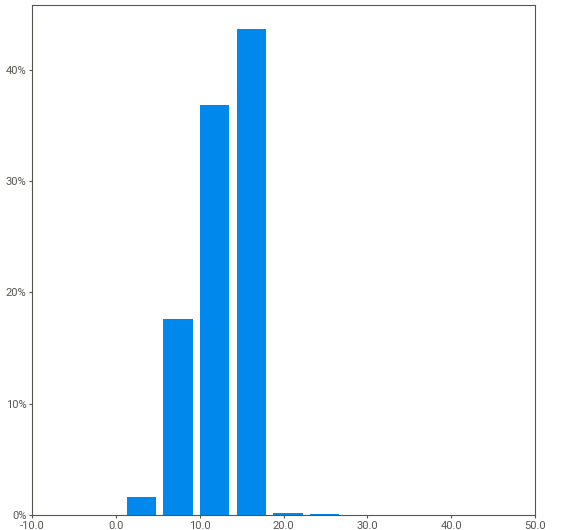
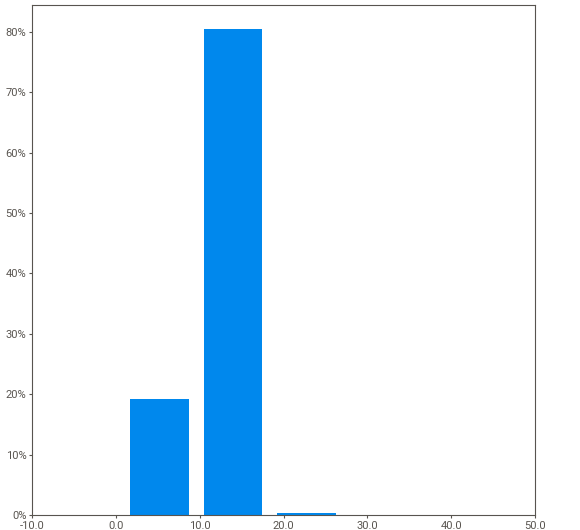
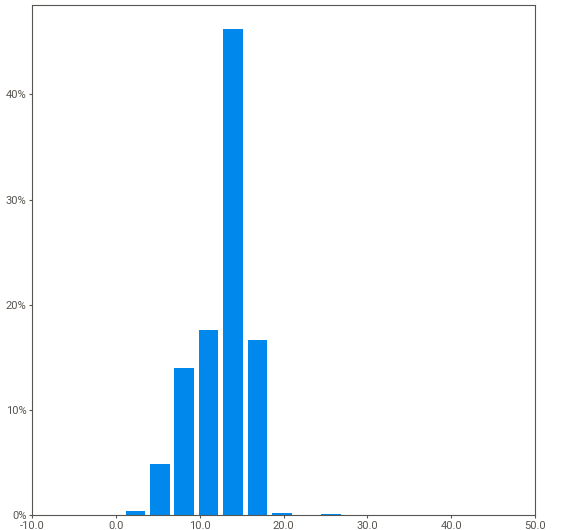
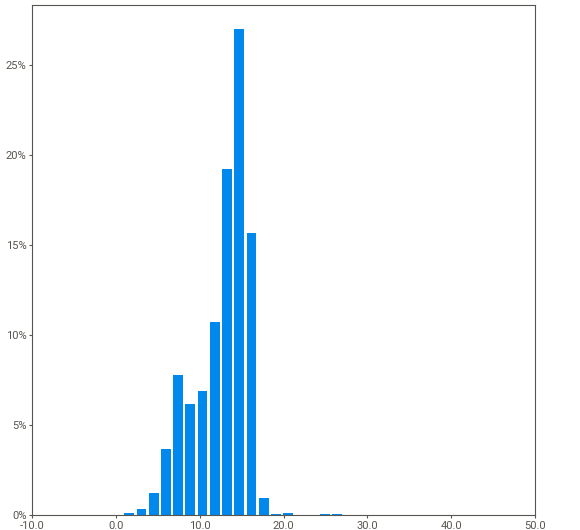
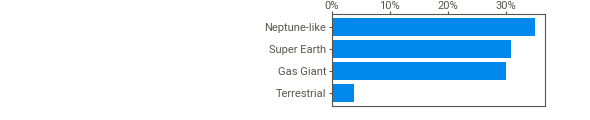
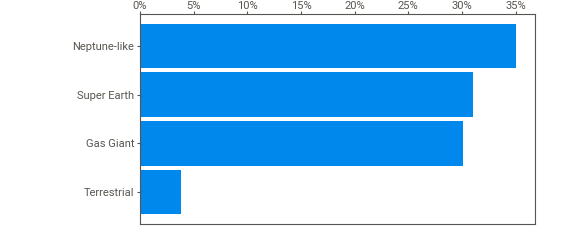
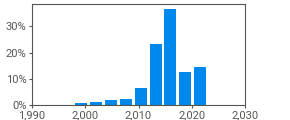
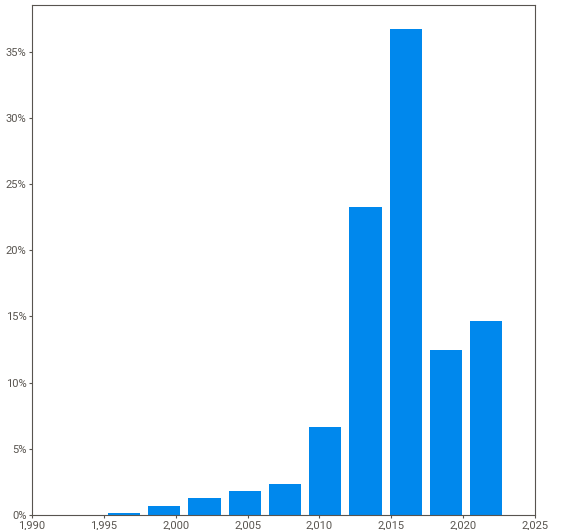
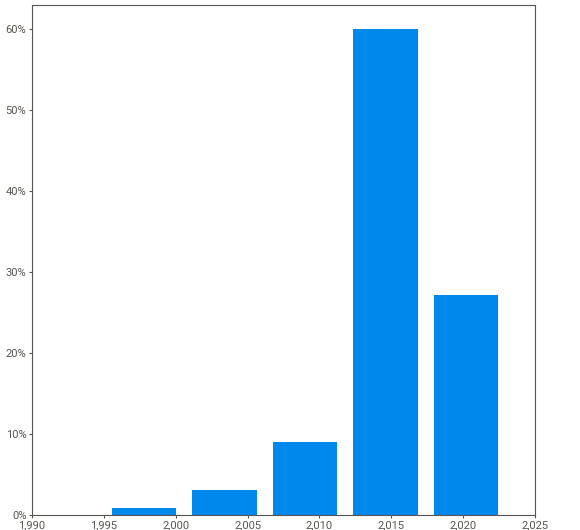
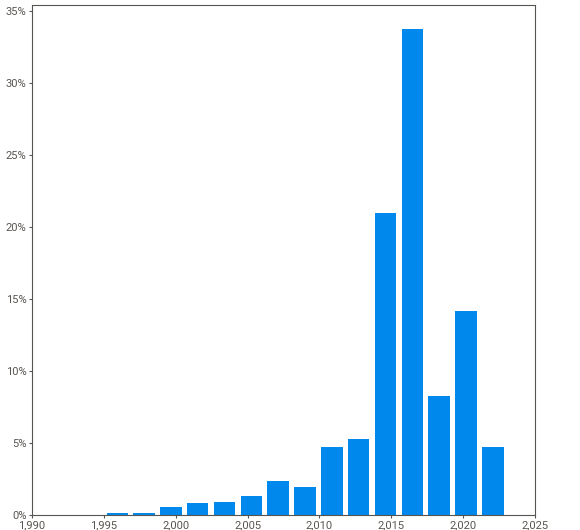
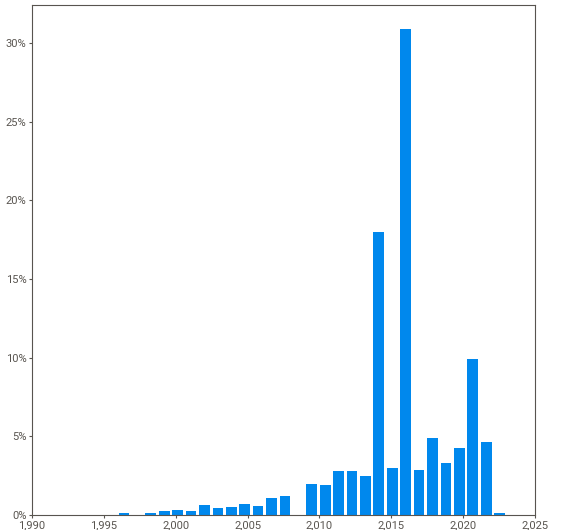
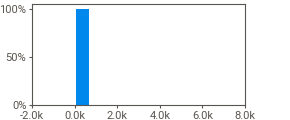
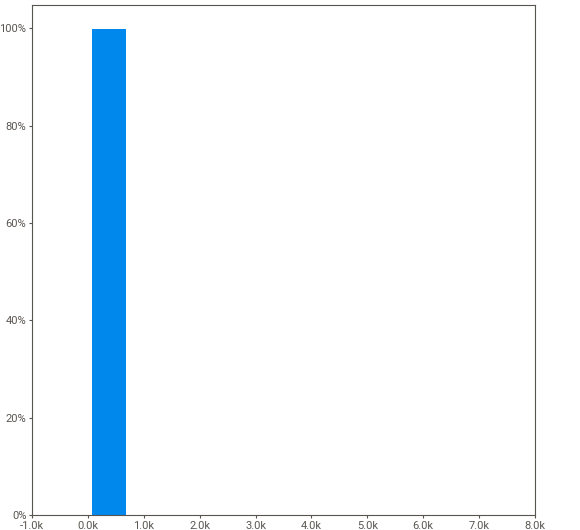
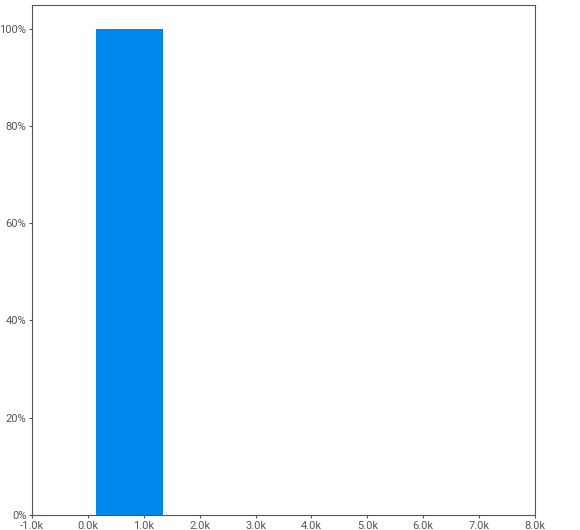
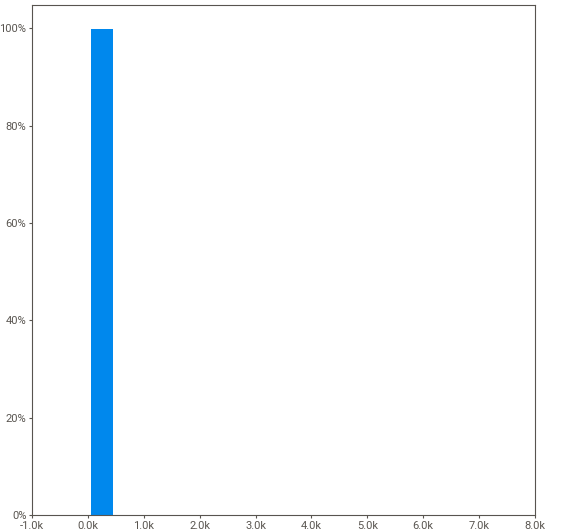
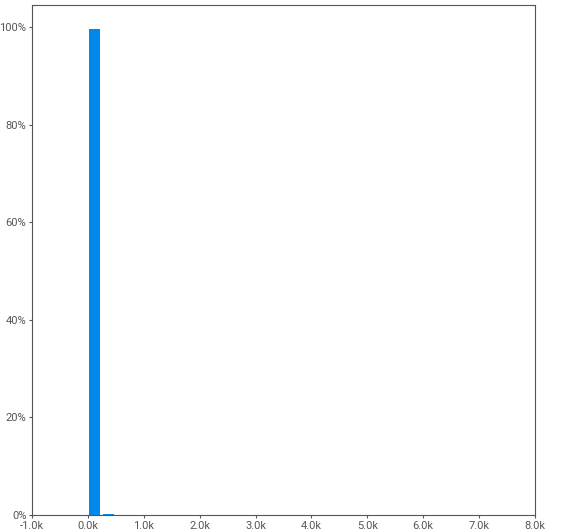
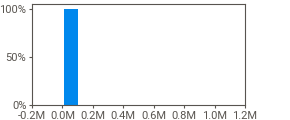
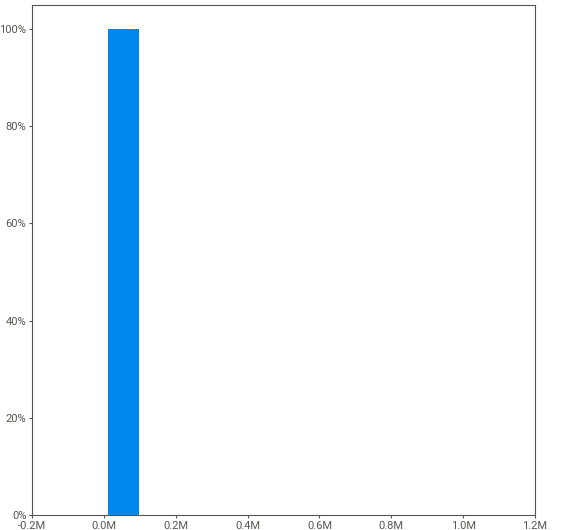
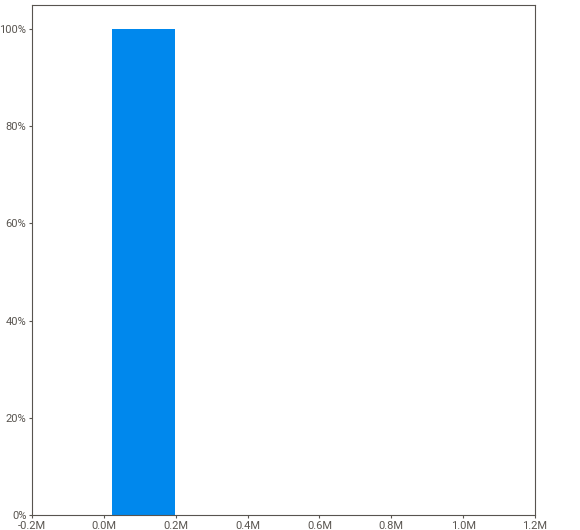
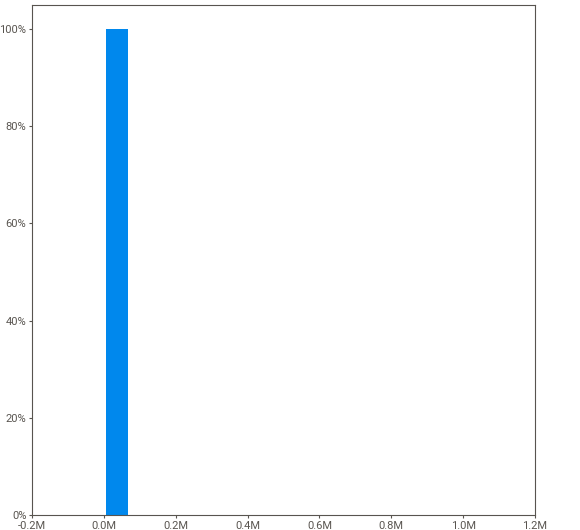
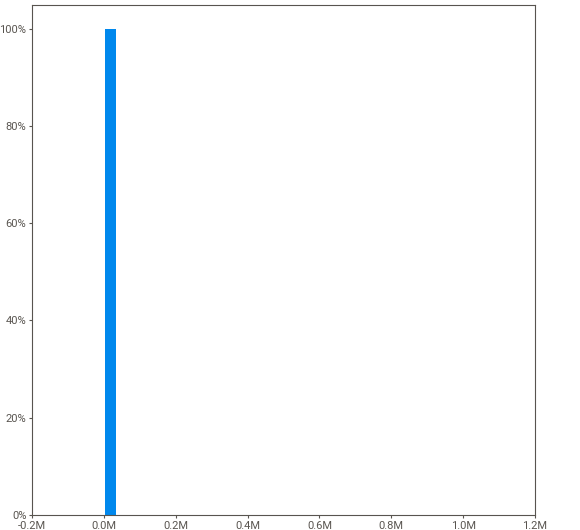
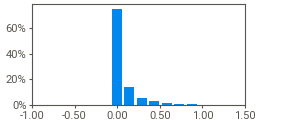
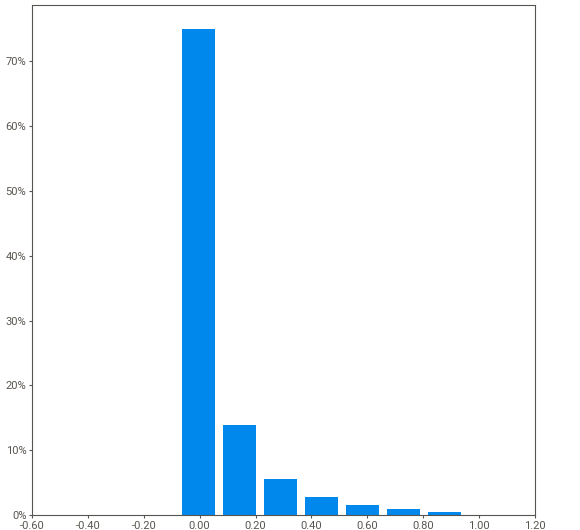
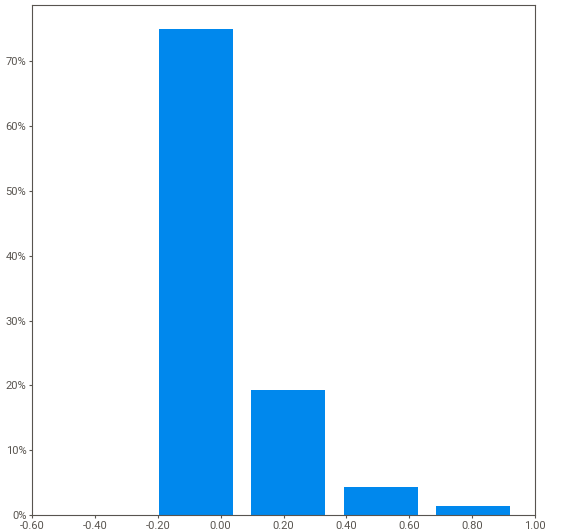
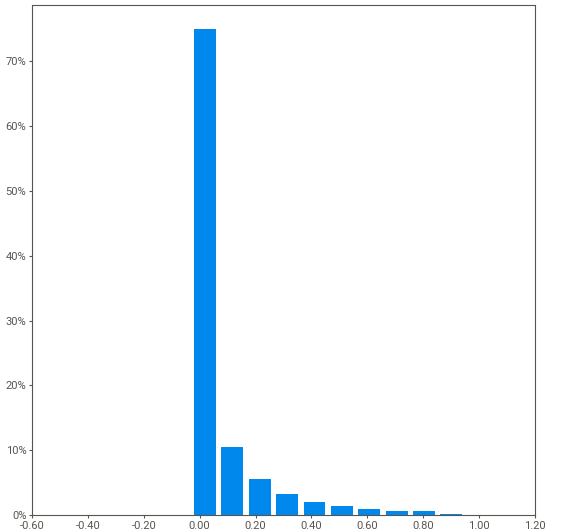
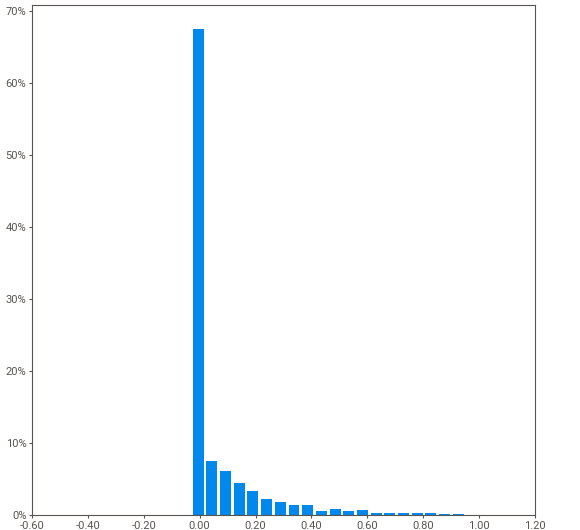
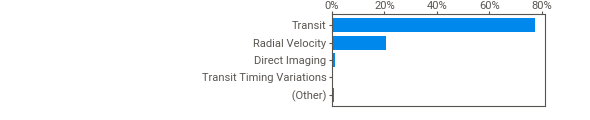
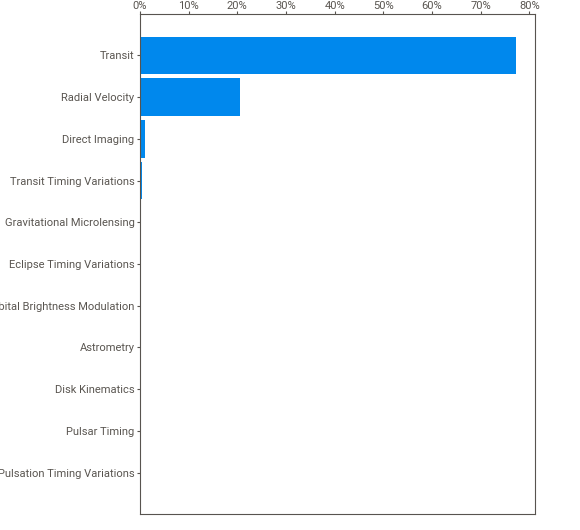
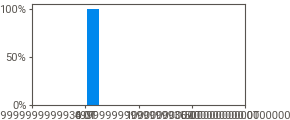
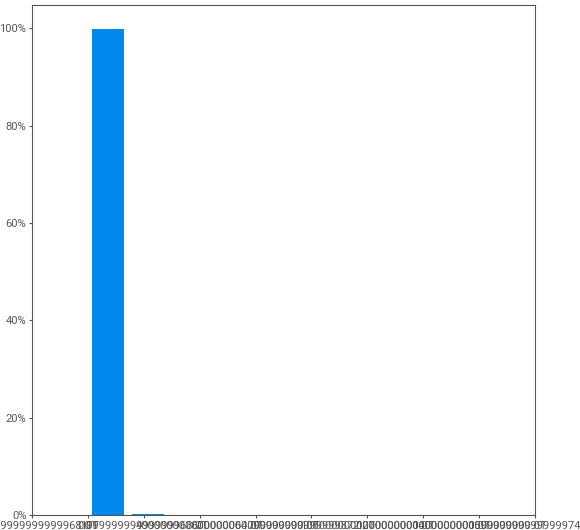
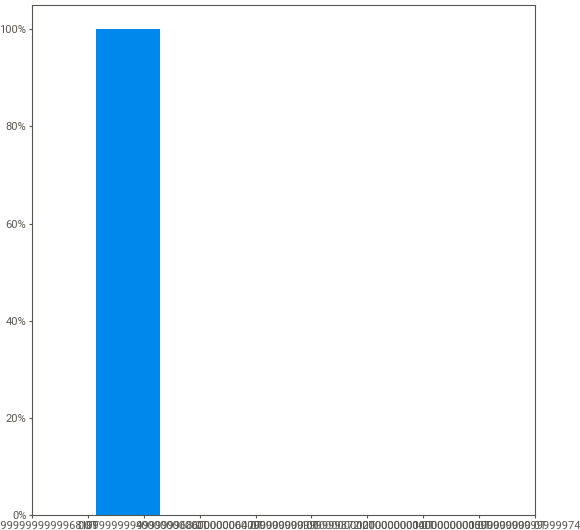
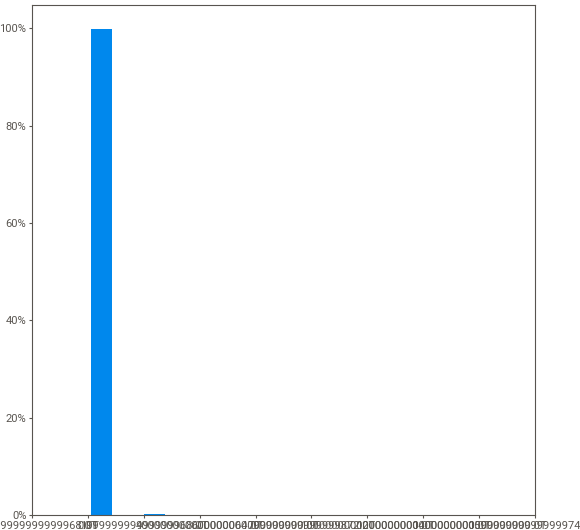
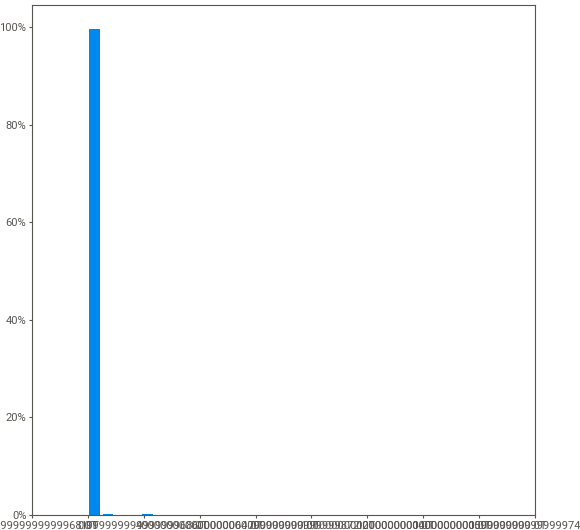
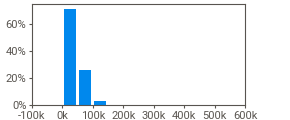
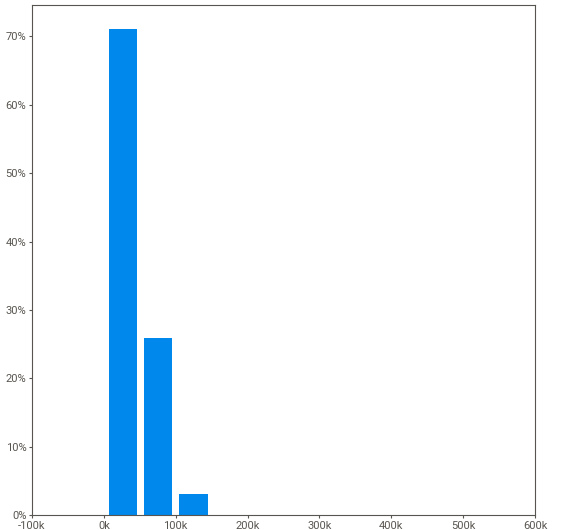
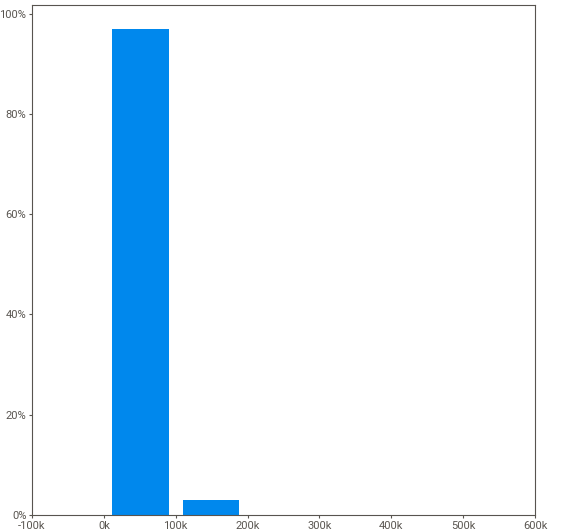
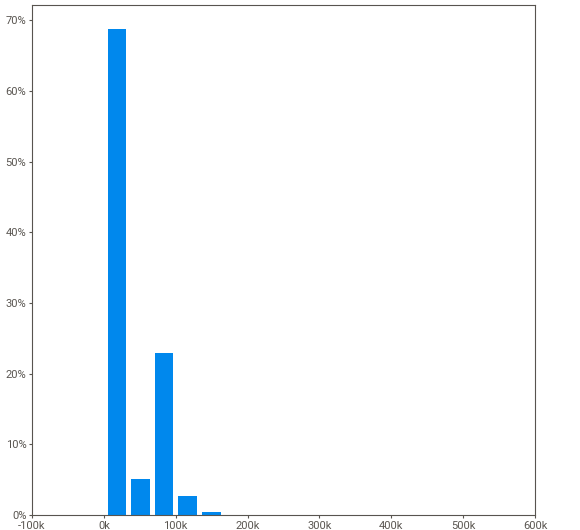
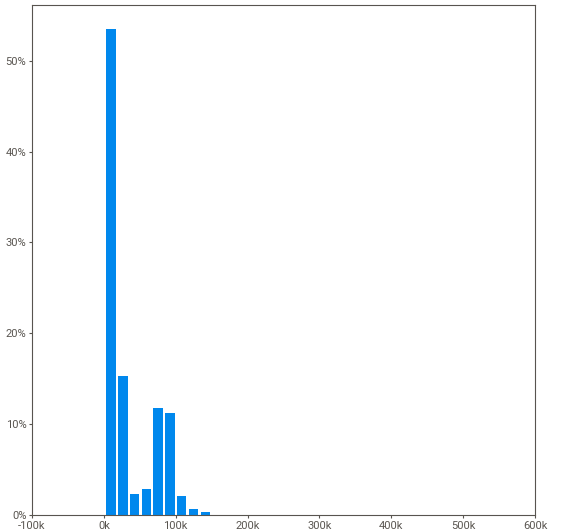
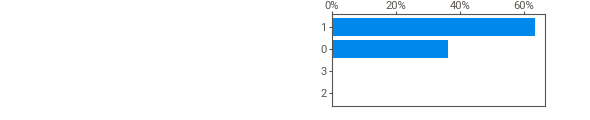
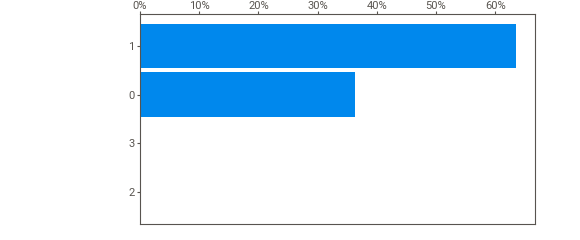
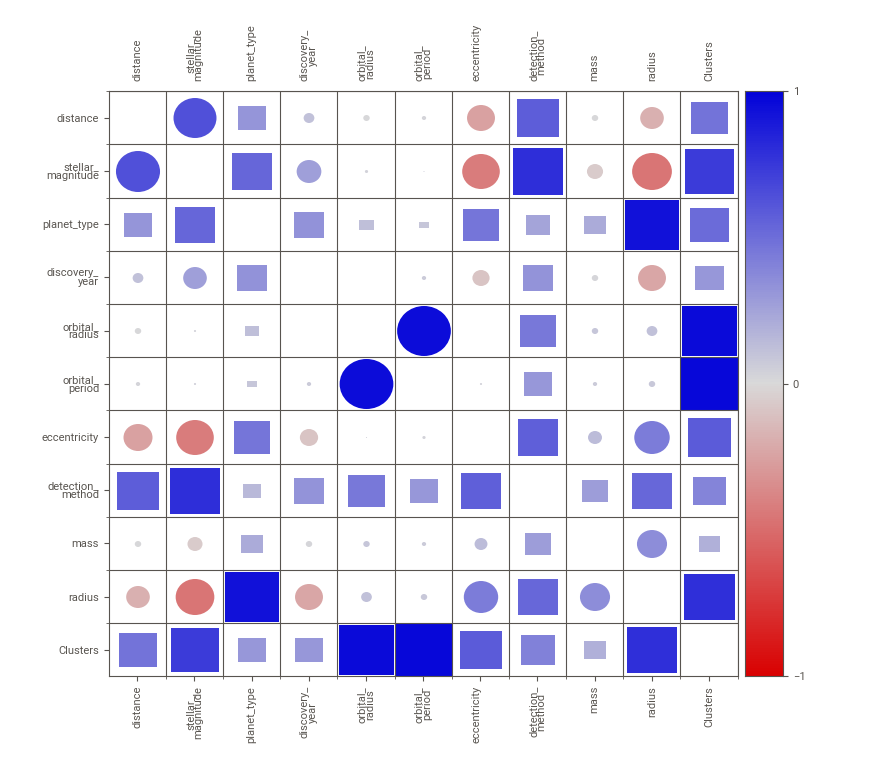
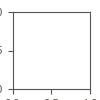

In [42]:
import sweetviz as sv

# Analyzing the dataset
report = sv.analyze(exo_df_cleaned)

# Display the HTML report in Jupyter notebook
report.show_notebook()

<a id="1"></a>
# <p style="background-color:#4E937A;font-family:Courier New;color:#EDEDED;font-size:100%;text-align:center;border-radius:15px 15px;">CONCLUSION</p>

    The analysis of this exoplanet dataset has revealed several interesting relationships and trends. The strong positive correlation between the orbital radius and orbital period of the exoplanets aligns with our understanding of planetary motion according to Kepler's laws. The relationship between stellar magnitude and distance further reinforces astronomical principles, suggesting that the further away an object is, the less bright it appears from our perspective on Earth.

    Different planet types seem to display varying trends in mass, radius, and potentially even in their orbital eccentricity. More massive planets tend to be larger, suggesting a diversity of planet compositions in the dataset, and perhaps a mix of gas giants and terrestrial planets.

    The clustering of exoplanets might have revealed groups of planets with similar characteristics, showing that certain types of planets are more common.

    Overall, the analysis has provided valuable insights into the properties and discovery of exoplanets. However, more detailed analysis could uncover additional trends and correlations, and further study could also explore the causal mechanisms behind these observed relationships.